In [1]:
import pandas as pd
df= pd.read_csv("crime_dataset_india.csv")
print(df)


       Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0                  1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
1                  2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
2                  3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
3                  4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
4                  5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   
...              ...               ...                ...                ...   
40155          40156  01-08-2024 16:00   07-31-2024 03:00   31-07-2024 05:05   
40156          40157  31-07-2024 14:00   07-31-2024 04:00   31-07-2024 04:14   
40157          40158  02-08-2024 03:00   07-31-2024 05:00   31-07-2024 21:33   
40158          40159  01-08-2024 19:00   07-31-2024 06:00   31-07-2024 11:05   
40159          40160  31-07-2024 17:00   07-31-2024 07:00   31-07-2024 17:19   

            City  Crime Code   Crime De

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df.isnull().sum() #Missing data
df.isnull().sum()/df.shape[0]*100 #Percentage of missing data

Report Number          0.000000
Date Reported          0.000000
Date of Occurrence     0.000000
Time of Occurrence     0.000000
City                   0.000000
Crime Code             0.000000
Crime Description      0.000000
Victim Age             0.000000
Victim Gender          0.000000
Weapon Used           14.417331
Crime Domain           0.000000
Police Deployed        0.000000
Case Closed            0.000000
Date Case Closed      50.044821
dtype: float64

In [4]:
df.fillna("Unresolved", inplace= True)

In [5]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Unresolved
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Unresolved
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Unresolved
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [6]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

In [7]:
df['Date Case Closed'] = df['Date Case Closed'].apply(
    lambda x: pd.to_datetime(x, errors='coerce') if x != 'Unresolved' else x
)


<ipython-input-7-a0f87fdbeb1c>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lambda x: pd.to_datetime(x, errors='coerce') if x != 'Unresolved' else x


In [8]:
df['Date Reported Only'] = df['Date Reported'].dt.date
df['Time Reported'] = df['Date Reported'].dt.time
df = df.drop(columns=['Date Reported'])

# Rename 'Date Reported Only' to 'Date Reported'
df = df.rename(columns={'Date Reported Only': 'Date Reported'})

In [9]:
columns = ['Date Reported', 'Time Reported'] + [col for col in df.columns if col not in ['Date Reported', 'Time Reported']]

# Reassign the DataFrame with the new column order
df = df[columns]
columns = ['Report Number'] + [col for col in df.columns if col != 'Report Number']

# Reassign the DataFrame with the new column order
df = df[columns]



In [10]:
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce').dt.strftime('%H:%M:%S')

In [11]:

df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

In [12]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce').dt.date


In [13]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

In [14]:
df.head()

,Report Number,Date Reported,Time Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-02-01,00:00:00,2020-01-01,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Unresolved
1,2,2020-01-01,19:00:00,2020-01-01,06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Unresolved
2,3,2020-02-01,05:00:00,2020-01-01,14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Unresolved
3,4,2020-01-01,05:00:00,2020-01-01,14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,5,2020-01-01,21:00:00,2020-01-01,16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-08-01 21:00:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       40160 non-null  int64         
 1   Date Reported       15874 non-null  datetime64[ns]
 2   Time Reported       15874 non-null  object        
 3   Date of Occurrence  40160 non-null  datetime64[ns]
 4   Time of Occurrence  15828 non-null  object        
 5   City                40160 non-null  object        
 6   Crime Code          40160 non-null  int64         
 7   Crime Description   40160 non-null  object        
 8   Victim Age          40160 non-null  int64         
 9   Victim Gender       40160 non-null  object        
 10  Weapon Used         40160 non-null  object        
 11  Crime Domain        40160 non-null  object        
 12  Police Deployed     40160 non-null  int64         
 13  Case Closed         40160 non-null  object    

In [17]:
df.describe()

,Report Number,Date Reported,Date of Occurrence,Crime Code,Victim Age,Police Deployed
count,40160.000000,15874,40160,40160.000000,40160.00000,40160.000000
mean,20080.500000,2022-04-18 23:13:06.040065792,2022-04-16 04:00:05.737051648,349.360259,44.49126,10.006250
min,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,100.000000,10.00000,1.000000
25%,10040.750000,2021-02-11 00:00:00,2021-02-22 00:00:00,225.000000,27.00000,5.000000
50%,20080.500000,2022-04-08 00:00:00,2022-04-16 00:00:00,349.000000,44.00000,10.000000
75%,30120.250000,2023-06-05 00:00:00,2023-06-08 06:00:00,474.000000,62.00000,15.000000
max,40160.000000,2024-12-07 00:00:00,2024-07-31 00:00:00,599.000000,79.00000,19.000000
std,11593.337742,NaN,NaN,144.169205,20.22555,5.467951


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\galxy\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


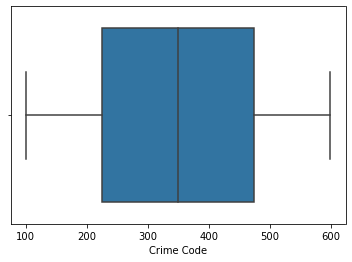

In [19]:
sns.boxplot(x= "Crime Code",data=df)
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()



TypeError: float() argument must be a string or a number, not 'datetime.time'

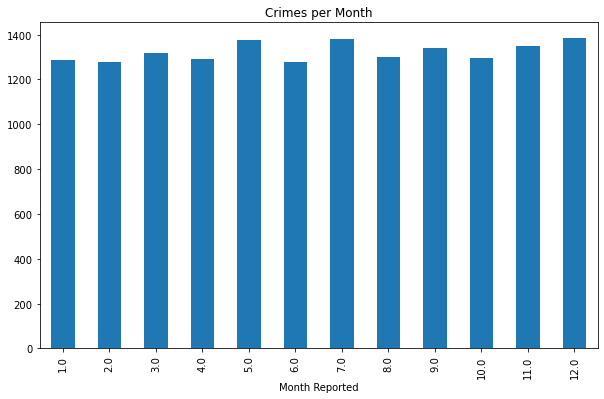

In [21]:
df['Month Reported'] = df['Date Reported'].dt.month
monthly_crimes = df.groupby('Month Reported').size()
monthly_crimes.plot(kind='bar', figsize=(10, 6), title="Crimes per Month")
plt.show()


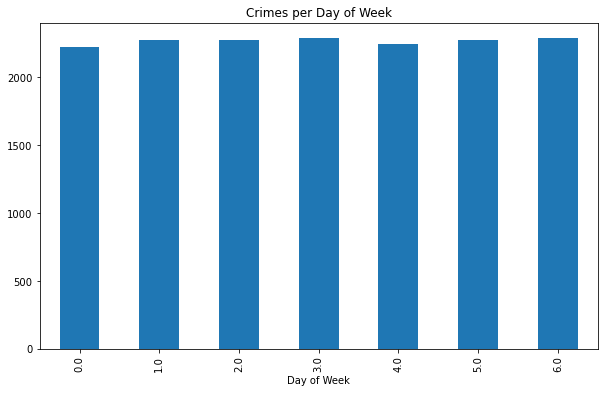

In [22]:
df['Day of Week'] = df['Date Reported'].dt.dayofweek
weekly_crimes = df.groupby('Day of Week').size()
weekly_crimes.plot(kind='bar', figsize=(10, 6), title="Crimes per Day of Week")
plt.show()


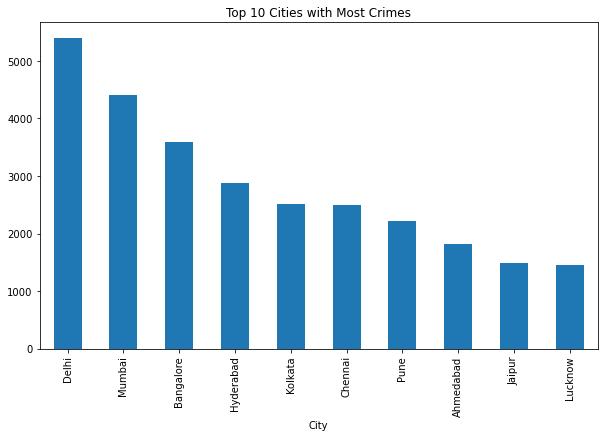

In [23]:
city_crimes = df.groupby('City').size().sort_values(ascending=False)
city_crimes.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Cities with Most Crimes")
plt.show()


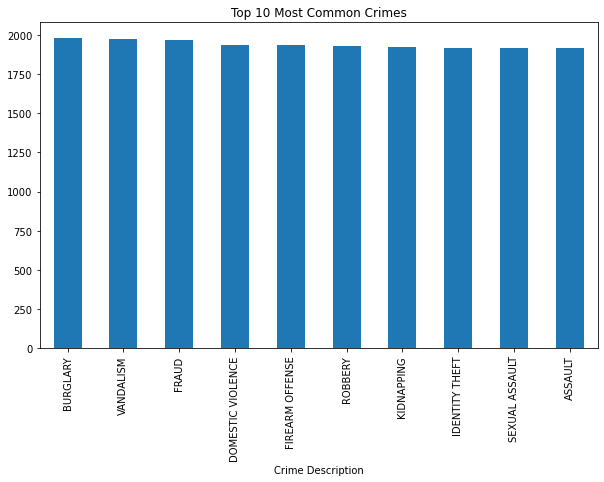

In [24]:
crime_type_counts = df['Crime Description'].value_counts()
crime_type_counts.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Most Common Crimes")
plt.show()


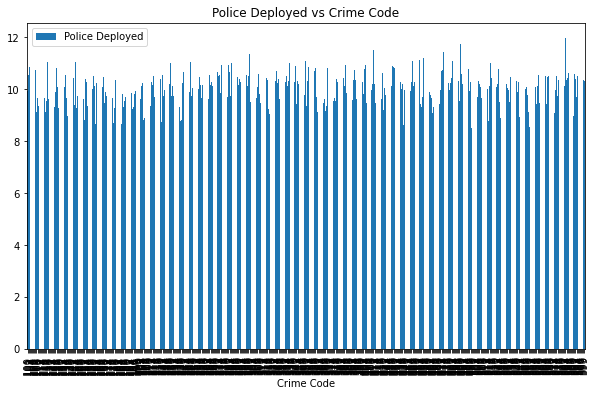

In [25]:
crime_severity_police = df[['Crime Code', 'Police Deployed']].groupby('Crime Code').mean()
crime_severity_police.plot(kind='bar', figsize=(10, 6), title="Police Deployed vs Crime Code")
plt.show()


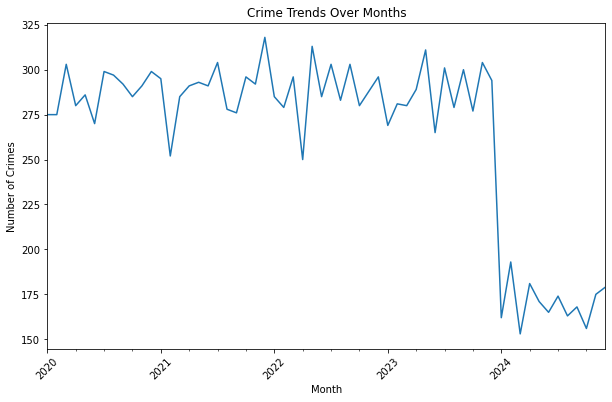

In [26]:
# Assuming 'df' is your DataFrame and 'Date Reported' is in datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'])

# Extract month and year from 'Date Reported'
df['Year-Month'] = df['Date Reported'].dt.to_period('M')

# Count crimes reported each month
monthly_crimes = df.groupby('Year-Month').size()

# Plot the data
monthly_crimes.plot(kind='line', figsize=(10, 6), title="Crime Trends Over Months")
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Convert 'Date Reported' to datetime if it is not already
df['Date Reported'] = pd.to_datetime(df['Date Reported'])

# Create a new column 'Day of Week' based on the 'Date Reported' column
df['Day of Week'] = df['Date Reported'].dt.day_name()

# Now you can group by 'Day of Week'
day_of_week_crimes = df.groupby('Day of Week').size().sort_values(ascending=False)


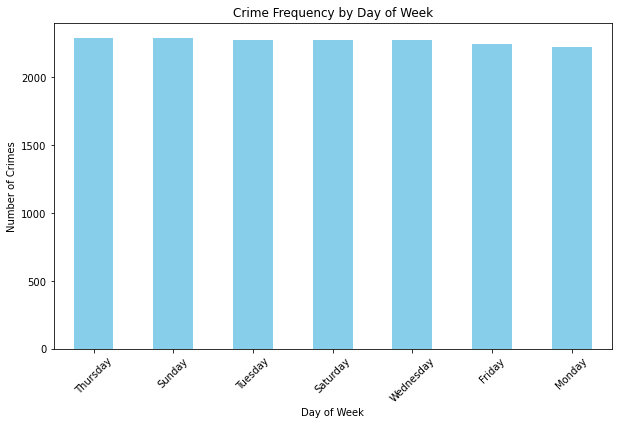

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
day_of_week_crimes.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Crime Frequency by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


In [30]:
df['Month'] = df['Date Reported'].dt.month_name()  # This gives the full month name (e.g., 'January', 'February')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       40160 non-null  int64         
 1   Date Reported       15874 non-null  datetime64[ns]
 2   Time Reported       15874 non-null  object        
 3   Date of Occurrence  40160 non-null  datetime64[ns]
 4   Time of Occurrence  15828 non-null  object        
 5   City                40160 non-null  object        
 6   Crime Code          40160 non-null  int64         
 7   Crime Description   40160 non-null  object        
 8   Victim Age          40160 non-null  int64         
 9   Victim Gender       40160 non-null  object        
 10  Weapon Used         40160 non-null  object        
 11  Crime Domain        40160 non-null  object        
 12  Police Deployed     40160 non-null  int64         
 13  Case Closed         40160 non-null  object    

In [39]:
import pandas as pd

# Load your cleaned data
df = pd.read_csv('cleaned_crime_data.csv')

# Ensure 'Date Reported' is in datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

# Create the 'Month' column
df['Month'] = df['Date Reported'].dt.month_name()  # Extracts the full month name

# Check if the 'Month' column was added successfully
print(df.head())  # This should show the 'Month' column in the first few rows


   Report Number Date Reported Time Reported Date of Occurrence  \
0              1    2020-02-01      00:00:00         2020-01-01   
1              2    2020-01-01      19:00:00         2020-01-01   
2              3    2020-02-01      05:00:00         2020-01-01   
3              4    2020-01-01      05:00:00         2020-01-01   
4              5    2020-01-01      21:00:00         2020-01-01   

  Time of Occurrence       City  Crime Code Crime Description  Victim Age  \
0           01:11:00  Ahmedabad         576    IDENTITY THEFT          16   
1           06:26:00    Chennai         128          HOMICIDE          37   
2           14:30:00   Ludhiana         271        KIDNAPPING          48   
3           14:46:00       Pune         170          BURGLARY          49   
4           16:51:00       Pune         421         VANDALISM          30   

  Victim Gender   Weapon Used   Crime Domain  Police Deployed Case Closed  \
0             M  Blunt Object  Violent Crime             

2024-12-29 17:37:04.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:37:05.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:37:05.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

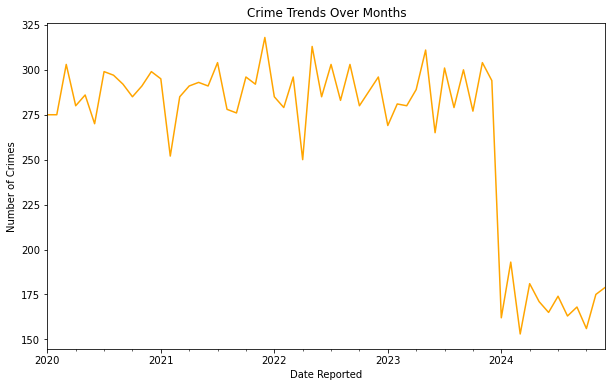

In [42]:
# Ensure 'Date Reported' is in datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

# Set 'Date Reported' as the index
df.set_index('Date Reported', inplace=True)

# Resample the data by month and get the crime count for each month
monthly_crimes = df.resample('M').size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
monthly_crimes.plot(kind='line', ax=ax, color='orange')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Trends Over Months')
st.pyplot(fig)


In [44]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_crime_data.csv', index=False)


2024-12-29 17:40:31.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 17:40:31.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2024-12-29 17:40:33.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


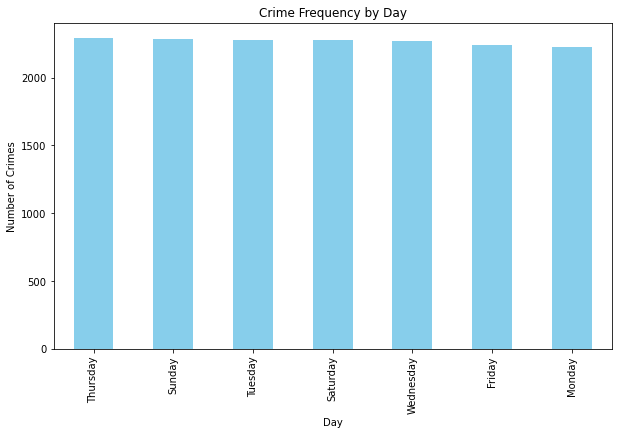

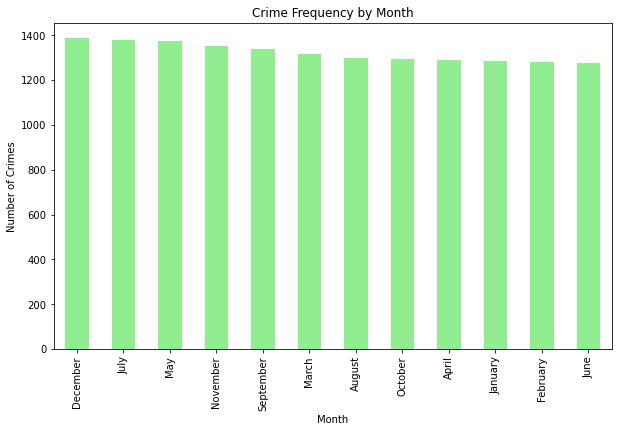

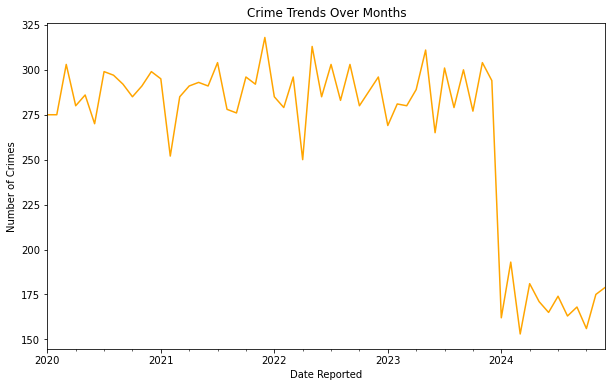

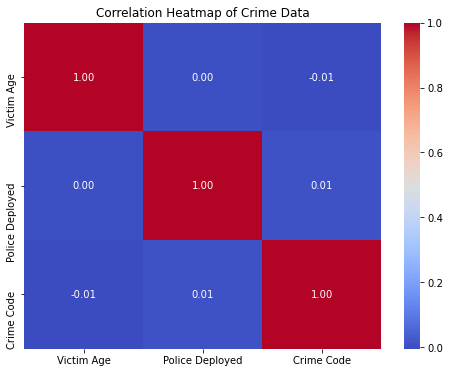

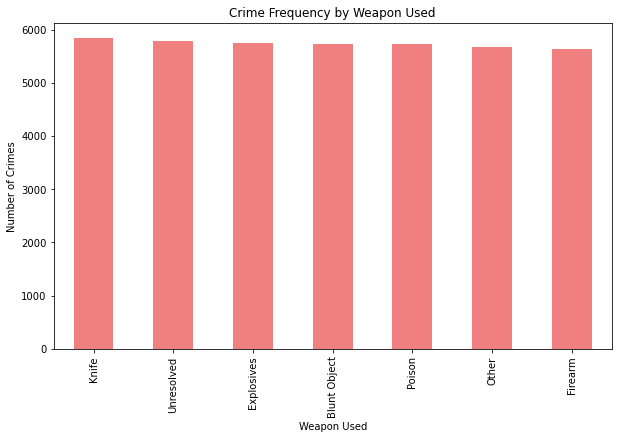

In [48]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="missing ScriptRunContext!")
# Load your cleaned data
df = pd.read_csv('cleaned_crime_data.csv')

# Set the page title
st.title('Crime Data Analysis Dashboard')

# Sidebar for user selections
st.sidebar.header("Filters")
selected_city = st.sidebar.selectbox("Select City", df['City'].unique())
selected_crime_code = st.sidebar.selectbox("Select Crime Code", df['Crime Code'].unique())

# Filter data based on selections
filtered_data = df[(df['City'] == selected_city) & (df['Crime Code'] == selected_crime_code)]

# Display filtered data
st.write(f"Filtered Data for City: {selected_city} and Crime Code: {selected_crime_code}")
st.dataframe(filtered_data)

# Create 'Day' column based on 'Date Reported'
df['Day'] = pd.to_datetime(df['Date Reported']).dt.day_name()

# Crime frequency by day
st.subheader('Crime Frequency by Day')
day_crimes = df.groupby('Day').size().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
day_crimes.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Frequency by Day')
st.pyplot(fig)

# Crime frequency by month
# Crime frequency by month
month_crimes = df.groupby('Month').size().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
month_crimes.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Frequency by Month')
st.pyplot(fig)


# Crime trends over months
# Ensure 'Date Reported' is in datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

# Set 'Date Reported' as the index
df.set_index('Date Reported', inplace=True)

# Resample the data by month and get the crime count for each month
monthly_crimes = df.resample('M').size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
monthly_crimes.plot(kind='line', ax=ax, color='orange')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Trends Over Months')
st.pyplot(fig)

# Heatmap of correlation between numeric features
st.subheader('Correlation Heatmap')
numeric_cols = ['Victim Age', 'Police Deployed', 'Crime Code']
correlation_matrix = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
ax.set_title("Correlation Heatmap of Crime Data")
st.pyplot(fig)

# Crime frequency by weapon used
st.subheader('Crime Frequency by Weapon Used')
weapon_crimes = df['Weapon Used'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
weapon_crimes.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Frequency by Weapon Used')
st.pyplot(fig)

# Show a summary of the crime data
st.subheader('Crime Data Summary')
st.write(f"Total Number of Records: {df.shape[0]}")
st.write(f"Number of Cities: {df['City'].nunique()}")
st.write(f"Number of Crime Codes: {df['Crime Code'].nunique()}")
st.write(f"Number of Unique Victim Genders: {df['Victim Gender'].nunique()}")
st.write(f"Number of Unique Weapons Used: {df['Weapon Used'].nunique()}")

# Deploy the Streamlit app
if __name__ == '__main__':
    st.title('Interactive Crime Data Analysis')
